In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('INFLUD-16-08-2021 - 2020.csv', sep=';', low_memory = False, encoding="ISO-8859-1")

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
import seaborn as sns
sns.set_theme(style="whitegrid")

df = df[(df['EVOLUCAO'].notna()) & (df['EVOLUCAO'] != 9) & (df['EVOLUCAO'] != 3)]

df = (
    df.assign
    (
        EVOLUCAO = np.where(df.EVOLUCAO == 1, 0, 1),
    )
)

<Figure size 864x432 with 0 Axes>

In [7]:
df[['PERD_OLFT', 'EVOLUCAO']]

,PERD_OLFT,EVOLUCAO
0,NaN,0
1,NaN,0
2,NaN,0
4,NaN,0
5,NaN,0
...,...,...
1197884,NaN,1
1197885,NaN,1
1197886,NaN,1
1197887,2.0,1


In [9]:
df.EVOLUCAO.value_counts(dropna=False)

0    728911
1    308481
Name: EVOLUCAO, dtype: int64

In [10]:
df.PERD_OLFT.value_counts(dropna=False)

NaN    568596
2.0    393694
1.0     50971
9.0     24131
Name: PERD_OLFT, dtype: int64

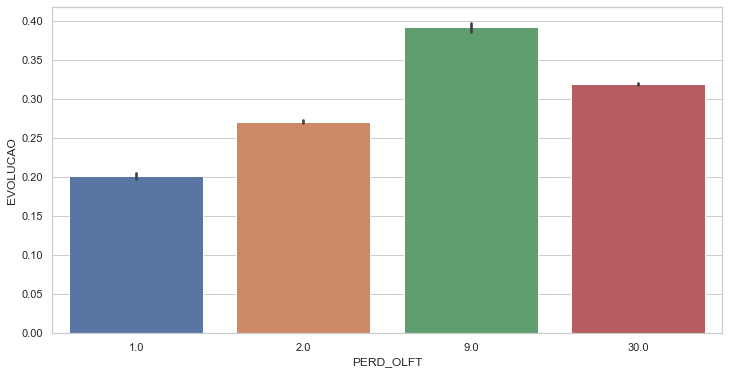

In [12]:
df1 = df[['PERD_OLFT', 'EVOLUCAO']]

plt.figure(figsize = (12,6))
ax = sns.barplot(x="PERD_OLFT", y="EVOLUCAO", data=df1.fillna(30))

In [15]:
pd.crosstab(df1.PERD_OLFT, df1.EVOLUCAO, normalize='index')

EVOLUCAO,0,1
PERD_OLFT,,
1.0,0.798297,0.201703
2.0,0.728637,0.271363
9.0,0.608015,0.391985


In [16]:
df2 = df[['CARDIOPATI', 'EVOLUCAO']]

In [17]:
df2.CARDIOPATI.value_counts(dropna=False)

NaN    487877
1.0    336542
2.0    206218
9.0      6755
Name: CARDIOPATI, dtype: int64

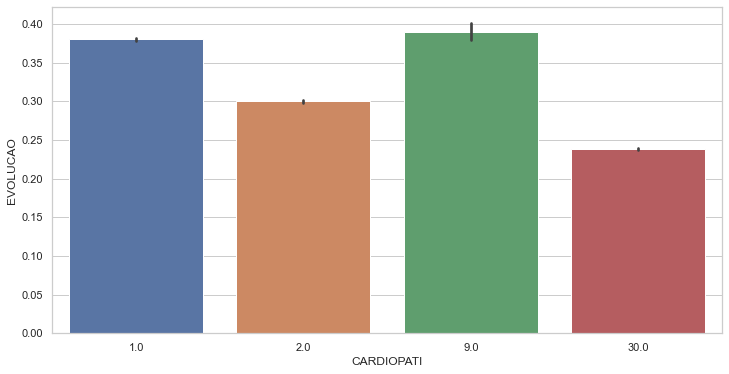

In [19]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x="CARDIOPATI", y="EVOLUCAO", data=df2.fillna(30))

In [20]:
df3 = df[['TOSSE', 'EVOLUCAO']]

In [22]:
df3.TOSSE.value_counts(dropna=False)

1.0    696001
2.0    219473
NaN    108517
9.0     13401
Name: TOSSE, dtype: int64

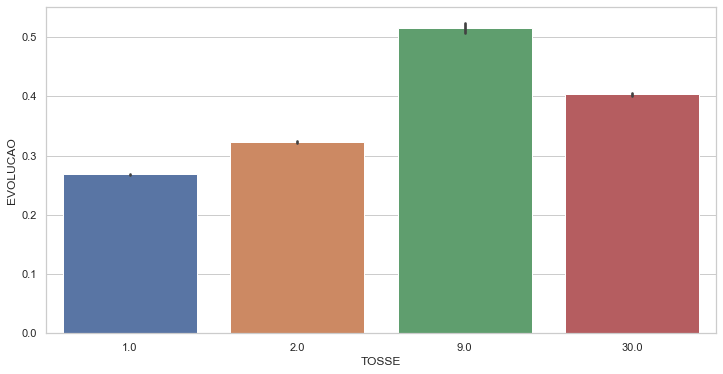

In [23]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x="TOSSE", y="EVOLUCAO", data=df3.fillna(30))

In [26]:
pd.set_option('display.max_rows', None)
df.ID_MUNICIP.value_counts(dropna=False)

SAO PAULO                           130901
RIO DE JANEIRO                       50711
BELO HORIZONTE                       32677
RECIFE                               29888
BRASILIA                             25514
CURITIBA                             24895
FORTALEZA                            22426
SALVADOR                             19432
MANAUS                               18878
GOIANIA                              15373
PORTO ALEGRE                         14539
CAMPINAS                             13023
GUARULHOS                            11826
BELEM                                11805
SAO JOSE DO RIO PRETO                11397
SAO BERNARDO DO CAMPO                11251
CAMPO GRANDE                          9808
TERESINA                              9597
LONDRINA                              8218
SANTOS                                7741
CUIABA                                6978
UBERLANDIA                            6855
NITEROI                               6836
RIBEIRAO PR

In [51]:
pd.reset_option('display.max_rows')

In [30]:
pd.set_option('display.max_rows', None)
df.ID_UNIDADE.value_counts(dropna=False)

HC DA FMUSP HOSPITAL DAS CLINICAS SAO PAULO                     5956
HOSPITAL DE BASE DE SAO JOSE DO RIO PRETO                       4964
HOSPITAL REGIONAL DE MATO GROSSO DO SUL                         4901
HOSPITAL E PRONTO SOCORRO DA ZONA NORTE DELPHINA AZIZ           4685
HRAN                                                            4630
HOSPITAL UNIMED                                                 4557
HOSP STA MAGGIORE BELA VISTA                                    4248
HOSPITAL SAO JOSE                                               4194
HOSPITAL UNIVERSITARIO REGIONAL DO NORTE DO PARANA              4151
HOSPITAL SANTA MARCELINA SAO PAULO                              4083
HOSPITAL NOSSA SENHORA DA CONCEICAO SA                          3954
HOSPITAL SAO LUCAS                                              3679
HOSPITAL E MATERNIDADE SALVALUS                                 3659
HOSPITAL DO ROCIO                                               3621
HOSPITAL OSWALDO CRUZ             

In [47]:
df4 = df[['ID_MUNICIP','ID_UNIDADE', 'EVOLUCAO']].copy()

In [48]:
df4['perc_missing'] = df.isnull().mean(axis=1)

In [53]:
pd.set_option('display.max_rows', None)
missing =  df4.groupby('ID_UNIDADE').agg(
    contagem = ('ID_UNIDADE', 'count'),
    perc = ('perc_missing', 'mean'),
    obito = ('EVOLUCAO', 'mean')
).sort_values(by = 'perc', ascending = False).reset_index()

pd.reset_option('display.max_rows')

# df_orders.agg(
#     Mais_antigo = ('order_timestamp_local', 'min'),
#     Mais_recente = ('order_timestamp_local', 'max'),
# )

In [54]:
missing.corr()

,contagem,perc,obito
contagem,1.000000,-0.067283,-0.206933
perc,-0.067283,1.000000,0.143477
obito,-0.206933,0.143477,1.000000


In [60]:
missing[missing.contagem > 100].corr(method = 'spearman')

,contagem,perc,obito
contagem,1.000000,-0.078787,-0.118157
perc,-0.078787,1.000000,0.178970
obito,-0.118157,0.178970,1.000000


In [61]:
missing[missing.contagem > 100]

,ID_UNIDADE,contagem,perc,obito
11,UPA 24H JARDIM IRIS,129,0.764975,0.992248
28,UNIDADE HOSPITALAR DE CODAJAS,474,0.739479,0.012658
38,HOSPITAL MUNICIPAL DE SAO JOAO DE MERITI ABDON...,164,0.732182,1.000000
44,HOSPITAL REGIONAL TOMAS MARTINS,219,0.721876,0.735160
57,SMS COORDENADORIA GERAL DE ATENCAO PRIMARIA AP 33,613,0.710525,0.998369
...,...,...,...,...
6037,HOSPITAL REGIONAL JUSTINO LUZ,255,0.418920,0.976471
6040,HOSPITAL METROPOLITANO DOM JOSE MARIA PIRES,1852,0.418200,0.366091
6041,AISI HOSPITAL DE CLINICAS DE ITAJUBA,876,0.416000,0.259132
6046,SANTA CASA DE NOVO HORIZONTE,303,0.415113,0.237624
